In [102]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [103]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df['flower_names']=df.target.apply(lambda x:iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [104]:
mms=MinMaxScaler()

df['petal length (cm)']=mms.fit_transform(df[['petal length (cm)']])
df['petal width (cm)']=mms.fit_transform(df[['petal width (cm)']])

In [105]:
x=df[['petal length (cm)','petal width (cm)']]
y=df['target']

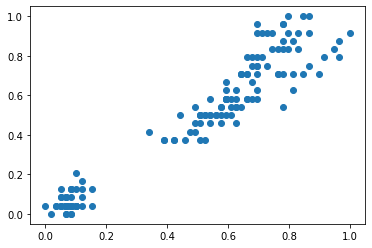

In [106]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [108]:
model=KMeans(n_clusters=3)
model.fit(x_train,y_train)

KMeans(n_clusters=3)

In [109]:
model.cluster_centers_

array([[0.55315871, 0.51136364],
       [0.07554479, 0.06547619],
       [0.7672592 , 0.81300813]])

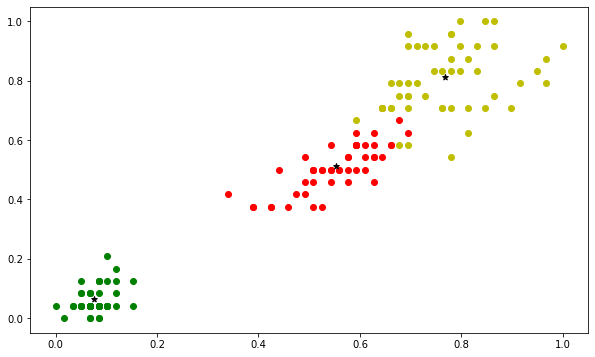

In [110]:
plt.figure(figsize=(10,6))
df1=df[df.target==1]
df0=df[df.target==0]
df2=df[df.target==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],c='g')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],c='r')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],c='y')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black',marker='*',label='centers')

In [111]:
model.score(x_test,y_test)

-0.31337207712997966

In [112]:
test_model_result=[]
for i in range(1,10):
    test_model=KMeans(n_clusters=i)
    test_model.fit(x_train,y_train)
    test_model_result.append(test_model.inertia_)
test_model_result

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[21.33397168208768,
 4.297968827241704,
 1.3939868013029544,
 0.9289992767100835,
 0.679248027399005,
 0.5194781601041139,
 0.4379085617986301,
 0.36453138028900217,
 0.31539272542631425]

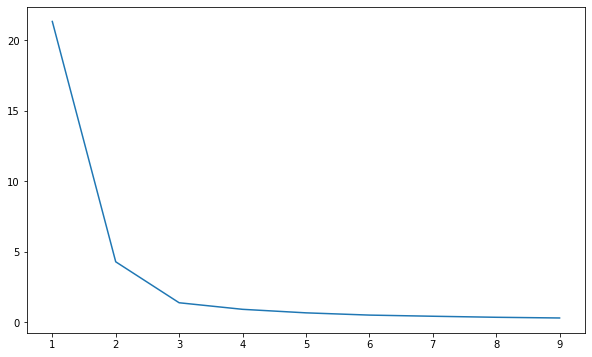

In [113]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),test_model_result)